In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [13]:
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('/Users/chaithanya/Documents/DDP/DDP-dump/Data/train.csv',index_col = 0)
test = pd.read_csv('/Users/chaithanya/Documents/DDP/DDP-dump/Data/test.csv',index_col = 0)
train.drop(columns = ['Stoich. Formula', 'Point Group','split','rad_mean','rad_var','SG_vec','SG_freq'],inplace=True)
test.drop(columns = ['Stoich. Formula', 'Point Group','split','rad_mean','rad_var','SG_vec','SG_freq'],inplace=True)

In [3]:
def fit_GBT(X,y,X_test,y_test):

    model = XGBClassifier(use_label_encoder=False, eta=0.3)
    param_grid = {'max_depth':[10,30,100],'min_child_weight':[5,6],'colsample_bytree' : [0.5,0.6,0.7,0.8,0.9,1],'colsample_bynode' : [0.5,0.6,0.7,0.8,0.9,1],'lambda' : [0.01,0.03,0.1,0.3,1,10,30]}

    gs = RandomizedSearchCV(model,param_distributions = param_grid, n_jobs = -1, n_iter = 30)
    results = gs.fit(X,y)
    print('Results of randomized search ...')

    #display(pd.DataFrame(results.cv_results_).sort_values('rank_test_score'))
    print('='*50)
    print('Best Parameters:')
    display(results.best_params_)
    clf = XGBClassifier(**results.best_params_)
    clf.fit(X,y)
    y_pred_train = clf.predict(X)
    y_pred_test = clf.predict(X_test)
    print('Precision, Recall and F1 score for train data')
    display(metrics.precision_recall_fscore_support(y,y_pred_train))
    print('Precision, Recall and F1 score for test data')
    display(metrics.precision_recall_fscore_support(y_test,y_pred_test))
    print('Accuracy on train data')
    display(metrics.accuracy_score(y,y_pred_train))
    print('Accuracy on test data')
    display(metrics.accuracy_score(y_test,y_pred_test))
    #acc_scores.append(metrics.accuracy_score(y_test,y_pred_test))
    print('='*50)
    print('Feature Importances')
    print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
    feat_importances.nlargest(40).plot(kind='barh')
    plt.show()

In [6]:
# 1) Check importance of s/p/d/f separately (what did he say about spdf?)
# 2) check onsite energy's importance
# 3) feature selection - SelectKBest, PCA, RFE
# https://machinelearningmastery.com/feature-selection-machine-learning-python/
# 4) Use SVM - Gaussian processes, marginal probab distribution

In [7]:
list(train.columns)

['NoE',
 'SG',
 's_bin',
 'p_bin',
 'd_bin',
 'f_bin',
 'S_mean',
 'S_var',
 'P_mean',
 'P_var',
 'D_mean',
 'D_var',
 'F_mean',
 'F_var',
 'row_mean',
 'row_var',
 'col_mean',
 'col_var',
 'en_mean',
 'en_var',
 'onsite_en',
 'C1',
 'C2',
 'C2h',
 'C2v',
 'C3',
 'C3h',
 'C3v',
 'C4',
 'C4h',
 'C4v',
 'C6',
 'C6h',
 'C6v',
 'Ci',
 'Cs',
 'D2',
 'D2d',
 'D2h',
 'D3',
 'D3d',
 'D3h',
 'D4',
 'D4h',
 'D6',
 'D6h',
 'O',
 'Oh',
 'S4',
 'S6',
 'T',
 'Td',
 'Th',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c6',
 'c7',
 'c8',
 'c9',
 'c10',
 'c11',
 'c12',
 'c13',
 'c14',
 'c15',
 'c16',
 'c17',
 'c18',
 'c19',
 'c20',
 'c21',
 'c22',
 'c23',
 'c24',
 'c25',
 'c26',
 'c27',
 'c28',
 'c29',
 'c30',
 'c31',
 'c32',
 'r1',
 'r2',
 'r3',
 'r4',
 'r5',
 'r6',
 'r7',
 'AtomicMass_avg',
 'AtomicMass_var',
 'Top_Class',
 'class0',
 'class1',
 'class2',
 'class3',
 'class4']

[16:26:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results of randomized search ...
Best Parameters:


{'min_child_weight': 6,
 'max_depth': 10,
 'lambda': 0.3,
 'colsample_bytree': 0.7,
 'colsample_bynode': 0.8}

[16:26:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Precision, Recall and F1 score for train data


(array([0.99978289, 0.98842444, 0.99536608, 0.98487032, 0.99840933]),
 array([0.99978289, 0.98336532, 0.99260628, 0.99273784, 0.99840933]),
 array([0.99978289, 0.98588839, 0.99398427, 0.98878843, 0.99840933]),
 array([4606, 1563, 1082, 1377, 1886]))

Precision, Recall and F1 score for test data


(array([0.93791946, 0.82085561, 0.74230769, 0.80655738, 0.85943775]),
 array([0.97048611, 0.78516624, 0.71217712, 0.71511628, 0.90870488]),
 array([0.95392491, 0.80261438, 0.72693032, 0.75808937, 0.88338493]),
 array([1152,  391,  271,  344,  471]))

Accuracy on train data


0.9954346585505041

Accuracy on test data


0.8718143780905288

Feature Importances
[0.02035488 0.01762044 0.         0.00954487 0.01946535 0.03634895
 0.018126   0.01786964 0.01021601 0.00723538 0.00617946 0.00869076
 0.0125137  0.01244087 0.0069157  0.00591056 0.00837835 0.01140743
 0.00583253 0.00712929 0.00621158 0.         0.         0.01342721
 0.02621115 0.         0.         0.         0.         0.
 0.         0.         0.         0.01083731 0.02082963 0.
 0.         0.00582855 0.01697677 0.         0.01698924 0.00304059
 0.         0.00727062 0.         0.00549511 0.         0.00802806
 0.01510547 0.01487595 0.         0.01366449 0.         0.01948505
 0.00757967 0.00713628 0.00777227 0.01297979 0.00959786 0.
 0.         0.0055388  0.0067118  0.00484195 0.00553155 0.00776778
 0.00776383 0.00851259 0.01067296 0.00707824 0.00867461 0.00964619
 0.01140276 0.0198483  0.01833778 0.00866922 0.00938033 0.01092186
 0.01090473 0.00725827 0.00634943 0.00867887 0.00731905 0.04034204
 0.         0.02071502 0.01101218 0.00629883 0.00624393 0.00446067

NameError: name 'plt' is not defined

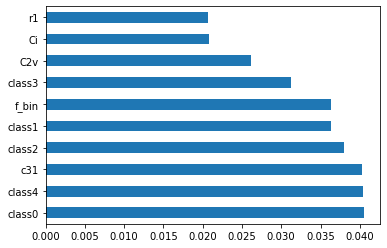

In [11]:
fit_GBT(train.drop(columns = ['Top_Class']),train['Top_Class'],test.drop(columns = ['Top_Class']),test['Top_Class'])

In [6]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split

In [7]:
Train, valid = train_test_split(train, test_size=0.2, stratify=train['Top_Class'])

## PCA

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()
pca.fit(train.drop(columns = ['Top_Class']))
print(list(pca.explained_variance_ratio_))
print(pca.n_components_)

[1.0, 3.812357067293125e-30, 8.751326999255392e-32, 3.4203274903581835e-32, 1.9464438038998436e-32, 1.255884238667904e-32, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-33, 9.88317631083445e-3

[15:49:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:52:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:54:17] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [18]:
pca = PCA(n_components = 0.9,svd_solver = 'full')
pca.fit(train.drop(columns = ['Top_Class']))
print(list(pca.explained_variance_ratio_))
print(pca.n_components_)

[1.0]
1


In [19]:
X = pca.transform(train.drop(columns = ['Top_Class']))
x_test = pca.transform(test.drop(columns = ['Top_Class']))
fit_GBT(X,train['Top_Class'],x_test,test['Top_Class'])

[16:34:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Results of randomized search ...
Best Parameters:


{'min_child_weight': 6,
 'max_depth': 100,
 'lambda': 1,
 'colsample_bytree': 1,
 'colsample_bynode': 0.9}

[16:34:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Precision, Recall and F1 score for train data


/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.44006157, 0.48333333, 0.        , 0.        , 0.        ]),
 array([0.99305254, 0.03710813, 0.        , 0.        , 0.        ]),
 array([0.60986667, 0.06892454, 0.        , 0.        , 0.        ]),
 array([4606, 1563, 1082, 1377, 1886]))

Precision, Recall and F1 score for test data


/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.44038462, 0.55172414, 0.        , 0.        , 0.        ]),
 array([0.99392361, 0.04092072, 0.        , 0.        , 0.        ]),
 array([0.61034115, 0.07619048, 0.        , 0.        , 0.        ]),
 array([1152,  391,  271,  344,  471]))

Accuracy on train data


0.4405554498763553

Accuracy on test data


0.44161278052491443

Feature Importances
[1.]


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## SelectKBest

In [4]:
from sklearn.feature_selection import SelectKBest

In [10]:
skb = SelectKBest(k = 'all')
skb.fit(Train.drop(columns=['Top_Class']),Train['Top_Class'])

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 2 84] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k='all')

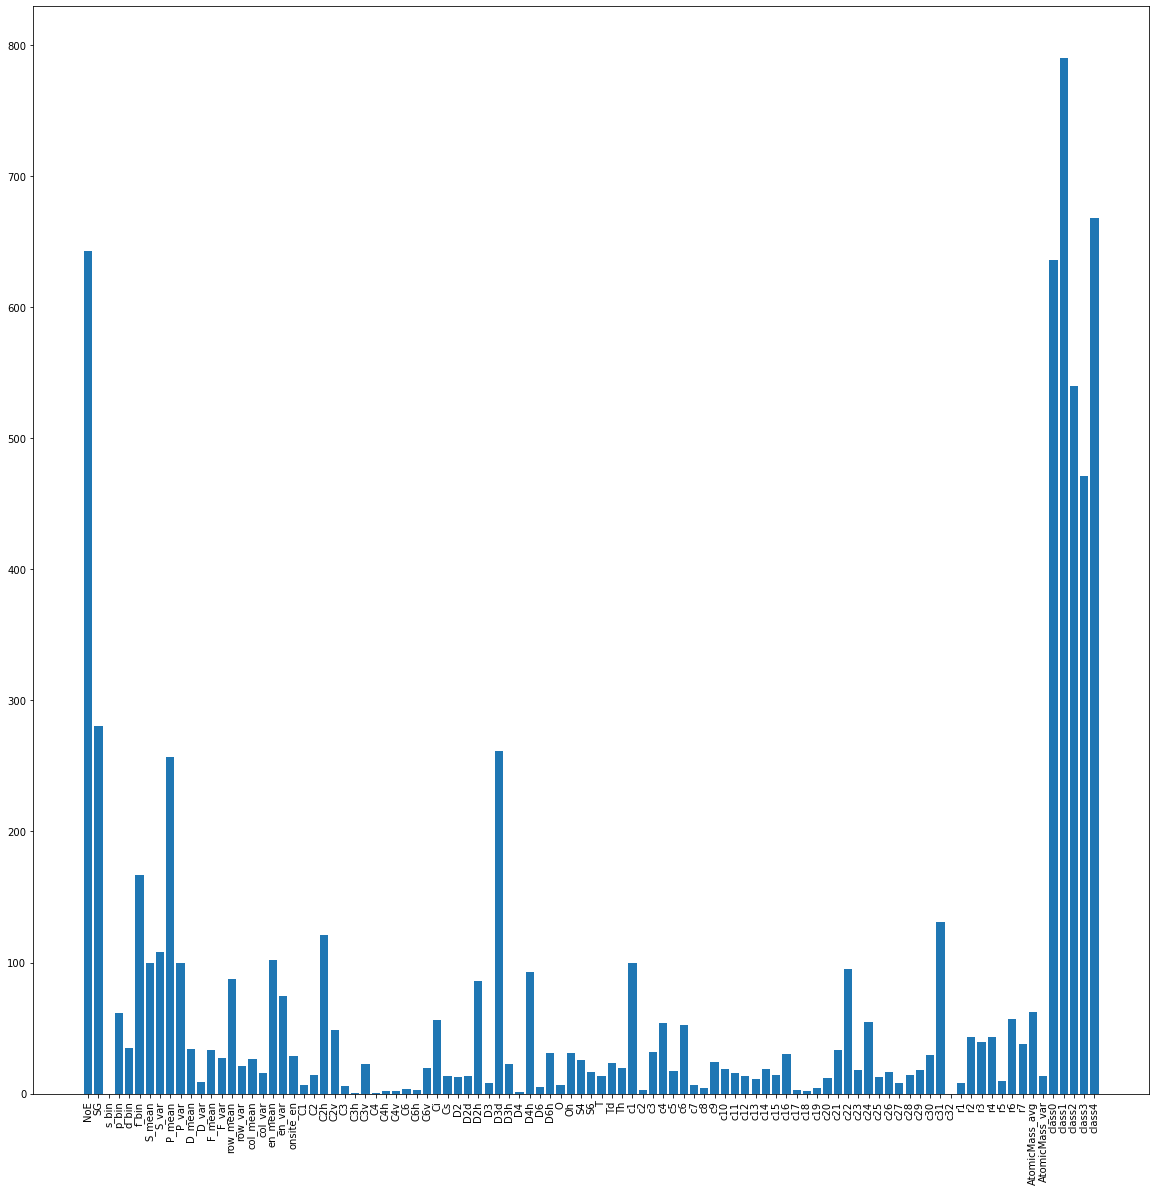

In [22]:
plt.figure(figsize=(20,20))
plt.bar(list(range(len(skb.scores_))),skb.scores_)
plt.xticks(list(range(len(skb.scores_))), x_labels, rotation='vertical')
plt.show()

In [16]:
x_labels = ['NoE', 'SG', 's_bin', 'p_bin', 'd_bin', 'f_bin', 'S_mean', 'S_var',
       'P_mean', 'P_var', 'D_mean', 'D_var', 'F_mean', 'F_var', 'row_mean',
       'row_var', 'col_mean', 'col_var', 'en_mean', 'en_var', 'onsite_en',
       'C1', 'C2', 'C2h', 'C2v', 'C3', 'C3h', 'C3v', 'C4', 'C4h', 'C4v', 'C6',
       'C6h', 'C6v', 'Ci', 'Cs', 'D2', 'D2d', 'D2h', 'D3', 'D3d', 'D3h', 'D4',
       'D4h', 'D6', 'D6h', 'O', 'Oh', 'S4', 'S6', 'T', 'Td', 'Th', 'c1', 'c2',
       'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23',
       'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30', 'c31', 'c32', 'r1',
       'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'AtomicMass_avg', 'AtomicMass_var', 'class0', 'class1', 'class2', 'class3', 'class4']

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 2 84] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


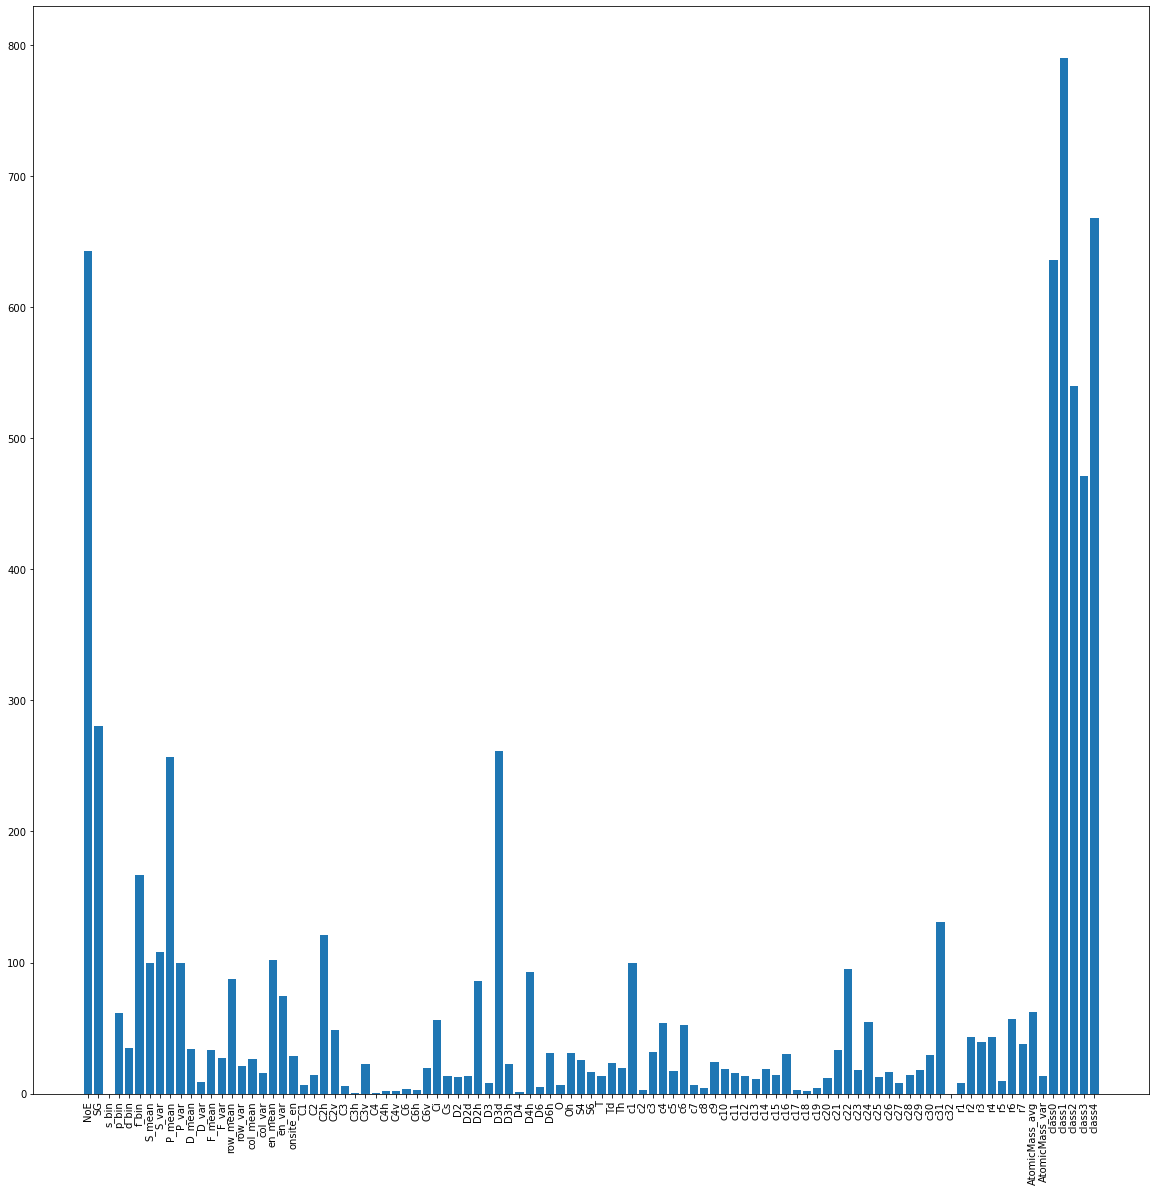

In [23]:
skb = SelectKBest(k = 50)
skb.fit(Train.drop(columns=['Top_Class']),Train['Top_Class'])
plt.figure(figsize=(20,20))
plt.bar(list(range(len(skb.scores_))),skb.scores_)
plt.xticks(list(range(len(skb.scores_))), x_labels, rotation='vertical')
plt.show()

In [39]:
scores_skb = pd.DataFrame({'features':x_labels, 'scores':skb.scores_})
scores_skb.sort_values(by='scores',inplace=True,ascending=False)

<AxesSubplot:xlabel='features'>

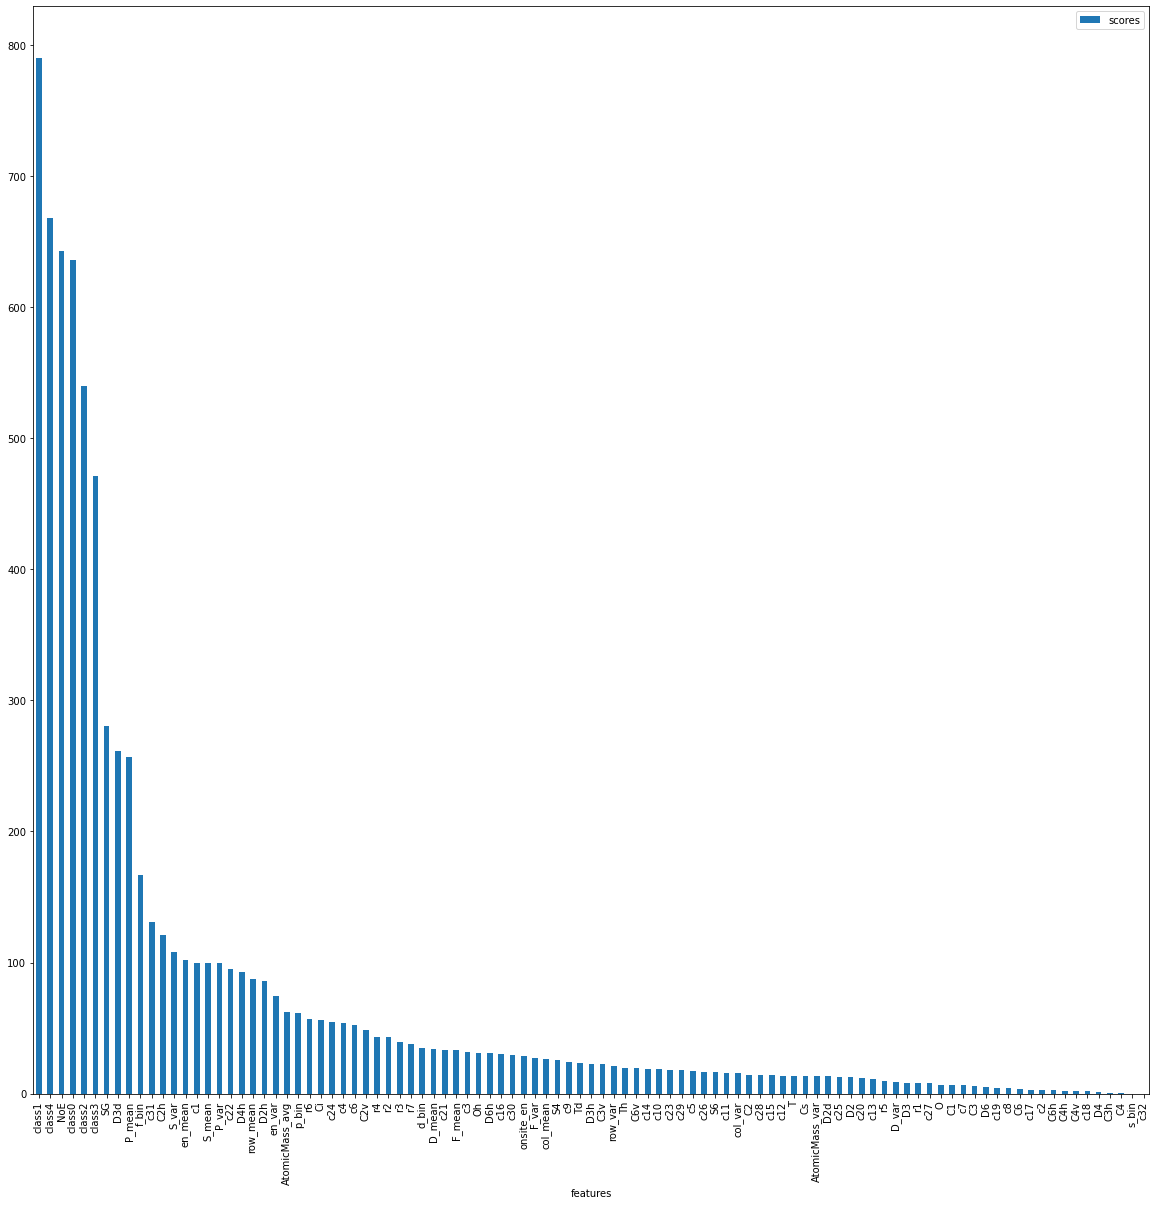

In [43]:
scores_skb.plot.bar(x = 'features', y = 'scores', figsize=(20,20))

## RFE

In [44]:
from sklearn.feature_selection import RFECV

[12:45:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:46:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[12:49:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:49:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[12:52:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:20] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:52:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[12:54:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:54:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[12:58:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:58:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[13:01:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:01:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:01:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:01:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[13:03:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:03:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[13:12:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:12:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:13:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

[13:24:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:24:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

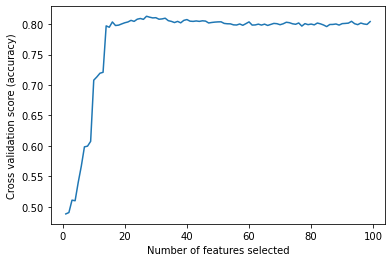

In [45]:
gbt = XGBClassifier(use_label_encoder=False, eta=0.3,**{'min_child_weight': 6,
 'max_depth': 100,
 'lambda': 1,
 'colsample_bytree': 1,
 'colsample_bynode': 0.9})
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=gbt,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(Train.drop(columns=['Top_Class']), Train['Top_Class'])

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [46]:
rfecv.ranking_

array([ 1,  1, 54, 40, 25,  1,  1, 29,  2, 19, 13, 12, 14,  1, 28, 27, 16,
        8, 23, 30, 22, 56, 57, 41, 58, 68, 55, 69, 73, 64, 66, 60, 47, 39,
       46, 48, 65, 44, 33, 49,  6, 59, 70, 20, 72, 38, 63, 51, 62, 36, 71,
       50, 67, 17, 10,  1,  1,  1,  1, 53, 52,  1, 35, 45, 43, 42,  5,  9,
        1, 21,  1,  1,  1,  1,  1,  1,  3,  1,  7,  4, 26, 18,  1,  1, 61,
        1,  1, 15, 31, 37, 24, 11, 34, 32,  1,  1,  1,  1,  1])

In [48]:
scores_rfecv = pd.DataFrame({'Features':x_labels, 'Ranking':rfecv.ranking_})
scores_rfecv.sort_values(by='Ranking',inplace=True,ascending=True)
scores_rfecv

,Features,Ranking
0,NoE,1
56,c4,1
57,c5,1
58,c6,1
61,c9,1
...,...,...
27,C3v,69
42,D4,70
50,T,71
44,D6,72


In [49]:
scores_rfecv.loc[scores_rfecv['Ranking'] == 1]

,Features,Ranking
0,NoE,1
56,c4,1
57,c5,1
58,c6,1
61,c9,1
68,c16,1
70,c18,1
71,c19,1
72,c20,1
73,c21,1


In [ ]:
# data of valence electrons, row and column data, SG, and NoE is enough

In [51]:
## Succinct dataset
TRAIN = train.drop(columns = ['AtomicMass_avg','AtomicMass_var','C1',
 'C2',
 'C2h',
 'C2v',
 'C3',
 'C3h',
 'C3v',
 'C4',
 'C4h',
 'C4v',
 'C6',
 'C6h',
 'C6v',
 'Ci',
 'Cs',
 'D2',
 'D2d',
 'D2h',
 'D3',
 'D3d',
 'D3h',
 'D4',
 'D4h',
 'D6',
 'D6h',
 'O',
 'Oh',
 'S4',
 'S6',
 'T',
 'Td',
 'Th', 'row_mean',
 'row_var',
 'col_mean',
 'col_var',
 'en_mean',
 'en_var'])
TEST = test.drop(columns=['AtomicMass_avg','AtomicMass_var','C1',
 'C2',
 'C2h',
 'C2v',
 'C3',
 'C3h',
 'C3v',
 'C4',
 'C4h',
 'C4v',
 'C6',
 'C6h',
 'C6v',
 'Ci',
 'Cs',
 'D2',
 'D2d',
 'D2h',
 'D3',
 'D3d',
 'D3h',
 'D4',
 'D4h',
 'D6',
 'D6h',
 'O',
 'Oh',
 'S4',
 'S6',
 'T',
 'Td',
 'Th', 'row_mean',
 'row_var',
 'col_mean',
 'col_var',
 'en_mean',
 'en_var'])

In [52]:
TEST.to_csv('/Users/chaithanya/Documents/DDP/DDP-dump/Data/test_small.csv',index=False)
TRAIN.to_csv('/Users/chaithanya/Documents/DDP/DDP-dump/Data/train_small.csv',index=False)